Domain 1 integral:  40.12036409533103  std:  13.88428250210513
estimation:  40.60762710621869 std:  2.9543376168348607
expect:  40.59191793818661


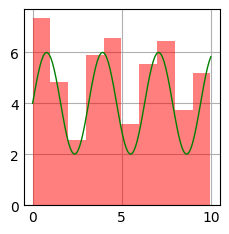

In [68]:
import matplotlib.pyplot as plt
import numpy as np
save_dir = "./final"
class RIS:
    y = 0
    w_sum = 0
    M = 0
    def __init__(self) -> None:
        pass
    def update(self, x, w):
        """ update the reservoir
        @param: selected x
        @param: weight (hat_pdf(x) / pdf(x))
        """
        self.w_sum = self.w_sum + w
        self.M = self.M + 1
        r = np.random.uniform(0, 1)
        if r < (w / self.w_sum): 
            self.y = x

plt.style.use('_mpl-gallery')


"""
Version1: same source pdf for the whole domain
"""
fig, ax = plt.subplots()

# plot target pdf
# x = np.linspace(0, 0.999, 10000)
x = np.linspace(0, 10, 100)
def target_pdf(x):
    # return 2 - 2 * x 
    return (4 + 2 * np.sin(2 * x))

ax.plot(x, target_pdf(x), 'g', linewidth=1)


# plot estimator
# sample_x = np.linspace(0, 0.999, 10000)
M = 32
def source_pdf(x):
    return 1 / 10.0


#***********************************
#* Regular Monte Carlo integration
#***********************************
sample_size = 1000

value = 0
contributions = []
for i in range(0,sample_size):
    y = np.random.uniform(0, 10.0)
    pdf = 1.0 / 10.0
    c = target_pdf(y) / pdf
    value += c
    contributions.append(c)
print("Domain 1 integral: ", value / sample_size, " std: ", np.std(contributions))

ws = np.zeros(sample_size)
ys = np.zeros(sample_size)
value = 0
contribute = []
for idx in range(0, sample_size):
    reservoir = RIS()
    for i in range(0, M):
        x = np.random.uniform(0, 10) # uniform distributed
        w = 1.0 / M * target_pdf(x) / source_pdf(x)
        reservoir.update(x, w)
    ys[idx] = reservoir.y
    ws[idx] = 1 / target_pdf(reservoir.y) * reservoir.w_sum
    value += ws[idx] * target_pdf(ys[idx])
    contribute.append(ys[idx])

print("estimation: ", value/sample_size, "std: ", np.std(contribute))
print("expect: ", 41 - np.cos(20))
counts,bins = np.histogram(ys, bins=512, density=True)

plt.hist(bins[:-1], weights=counts, alpha=0.5, color="r", stacked=True)

# ax.scatter(ys, 1 / ws, s = 0.5)
# ax.set(xlim=(0, 10), xticks=np.arange(1, 10),
#        ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()
# plt.savefig(save_dir+"ris_1.png", bbox_inches="tight", pad_inches=0.3)  


